In [1]:
#pip install geopandas
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
unicorns = pd.read_csv(r'/Users/anacarolinaquintino/Documents/GitHub/Project4-WebScrap/Files/Unicorns&Countries.csv')

In [3]:
unicorns

,Unnamed: 0.1,Unnamed: 0,Name,Country,Industry,Valuation ($ Billion),score,nb_reviews,classification
0,0,0,Bytedance,China,Artificial Intelligence,140.0,3.175,130.0,bad
1,1,1,SpaceX,United States,Other,100.3,3.305,331.0,good
2,2,2,Shein,China,E-commerce & direct-to-consumer,100.0,3.175,130.0,bad
3,3,3,Stripe,United States,Fintech,95.0,3.305,331.0,good
4,4,4,Klarna,Sweden,Fintech,45.6,3.060,752.0,bad
...,...,...,...,...,...,...,...,...,...
1261,1261,1261,Dana,Indonesia,Financial technology,1.0,3.720,2250.0,good
1262,1262,1262,Neo Financial,Canada,Financial technology,1.0,3.060,1221.0,bad
1263,1263,1263,Physicswallah,India,Educational technology,1.1,3.490,428.0,good
1264,1264,1264,Onecard,India,Financial technology,1.4,3.490,428.0,good


In [4]:
df11 =unicorns.groupby(['Country','classification']).agg({ 'Name':'count'}).reset_index()
df11

,Country,classification,Name
0,Argentina,good,3
1,Australia,bad,9
2,Austria,bad,2
3,Bangladesh,bad,1
4,Belgium,bad,3
5,Bermuda,bad,1
6,Brazil,bad,23
7,Canada,bad,24
8,Chile,bad,2
9,China,bad,218


In [5]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world1 = world[world['continent']!= 'Antarctica'] 
world1

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [6]:
world1['name'] = world1['name'].replace(['Bahamas'], 'The Bahamas')
world1['name'] = world1['name'].replace(['United States of America'], 'United States')

/Users/anacarolinaquintino/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [7]:
try2 = pd.merge(world1, df11, how='left', left_on='name', right_on='Country')
try2

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,classification,Name
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,bad,24.0
4,328239523.0,North America,United States,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,good,615.0
...,...,...,...,...,...,...,...,...,...
171,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN,NaN,NaN
172,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,NaN
173,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN
174,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,NaN


In [8]:
try2['Name'].fillna(0, inplace=True)

In [9]:
try2

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,classification,Name
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,0.0
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,0.0
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,0.0
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,bad,24.0
4,328239523.0,North America,United States,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,good,615.0
...,...,...,...,...,...,...,...,...,...
171,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN,NaN,0.0
172,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,0.0
173,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,0.0
174,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,0.0


In [24]:
try2['Name'] = try2['Name'].apply(lambda count : int(count))

In [26]:
try2

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,classification,Name
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,0
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,0
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,0
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,bad,24
4,328239523.0,North America,United States,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,good,615
...,...,...,...,...,...,...,...,...,...
171,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN,NaN,0
172,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,0
173,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,0
174,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,0


(-198.0, 198.00000000000006, -62.574678, 90.607978)

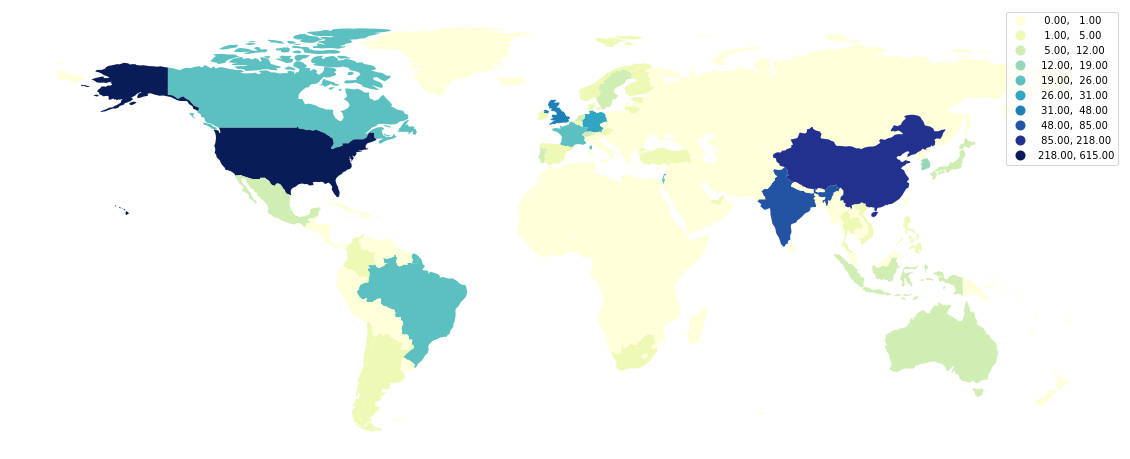

In [31]:
try2.plot(column='Name', cmap='YlGnBu', legend=True, scheme='naturalbreaks',k=10, figsize=(20, 15))
plt.axis('off')